In [1]:
import matplotlib, os
matplotlib.use('Agg')
%matplotlib inline
from gather_metrics import *
import pandas as pd
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

model_directory = '../../../job_results_small/'
class_dirs = [model_directory+'/random_forest/stage_1/',
              model_directory+'/irv/stage_1/',
              model_directory+'/light_chem/stage_1/',
              model_directory+'/neural_networks/stage_1/',
              model_directory+'/docking/stage_1/']
k = 5

In [2]:
#setup gather matrix
gather_df = gather_dir_metrics(class_dirs[0], k)     
gather_df = gather_df.append(gather_dir_metrics(class_dirs[1], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[2], k))   
gather_df = gather_df.append(gather_dir_metrics(class_dirs[3], 20))
gather_df = gather_df.append(gather_dir_metrics(class_dirs[4], k))

gather_df = gather_df.dropna(axis=0)

col_indices = list(range(10)) + list(range(15, 20)) + list(range(25, 65)) + list(range(145, 149)) + list(range(150, 183))
col_indices = [i for i in col_indices if 'Mean' not in gather_df.columns[i] and 'Median' not in gather_df.columns[i]]
metric_names = list(gather_df.columns.values[col_indices])

#setup comparison matrix and overlaps
dtk_dict = dtk_multi_metrics(gather_df)
dtk_analysis_dict = analyze_dtk_dict(dtk_dict)
mm_comp_dicts = get_mean_median_comps(gather_df)
agg_comp_dict = get_agg_comp(mm_comp_dicts, dtk_analysis_dict, mean_w=0, median_w=0, tukey_w=1)
overlapping_models = get_overlap(agg_comp_dict, N=1)

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3858: RuntimeWarning: Invalid value encountered in median for 185 results
  r = func(a, **kwargs)


---
## Model Ordering by Metric (Best-to-Worst)
Shows table with model-winscore pairs in the cells.

In [3]:
ordered_df = get_model_ordering(agg_comp_dict, metric_names)
ordered_df

,ROC AUC PriA-SSB AS,ROC AUC PriA-SSB FP,ROC AUC RMI-FANCM1,BEDROC AUC PriA-SSB AS,BEDROC AUC PriA-SSB FP,BEDROC AUC RMI-FANCM1,PR auc.integral PriA-SSB AS,PR auc.integral PriA-SSB FP,PR auc.integral RMI-FANCM1,NEF_0.1 % PriA-SSB AS,NEF_0.1 % PriA-SSB FP,NEF_0.1 % RMI-FANCM1,NEF_0.15 % PriA-SSB AS,NEF_0.15 % PriA-SSB FP,NEF_0.15 % RMI-FANCM1,NEF_0.5 % PriA-SSB AS,NEF_0.5 % PriA-SSB FP,NEF_0.5 % RMI-FANCM1,NEF_1 % PriA-SSB AS,NEF_1 % PriA-SSB FP,NEF_1 % RMI-FANCM1,NEF_2 % PriA-SSB AS,NEF_2 % PriA-SSB FP,NEF_2 % RMI-FANCM1,NEF_5 % PriA-SSB AS,NEF_5 % PriA-SSB FP,NEF_5 % RMI-FANCM1,NEF_10 % PriA-SSB AS,NEF_10 % PriA-SSB FP,NEF_10 % RMI-FANCM1,NEF_20 % PriA-SSB AS,NEF_20 % PriA-SSB FP,NEF_20 % RMI-FANCM1,NEF AUC PriA-SSB AS,NEF AUC PriA-SSB FP,NEF AUC RMI-FANCM1,n_hits_100 PriA-SSB AS,n_hits_100 PriA-SSB FP,n_hits_100 RMI-FANCM1,n_hits_250 PriA-SSB AS,n_hits_250 PriA-SSB FP,n_hits_250 RMI-FANCM1,n_hits_500 PriA-SSB AS,n_hits_500 PriA-SSB FP,n_hits_500 RMI-FANCM1,n_hits_1000 PriA-SSB AS,n_hits_1000 PriA-SSB FP,n_hits_1000 RMI-FANCM1,n_hits_2500 PriA-SSB AS,n_hits_2500 PriA-SSB FP,n_hits_2500 RMI-FANCM1,n_hits_5000 PriA-SSB AS,n_hits_5000 PriA-SSB FP,n_hits_5000 RMI-FANCM1,n_hits_10000 PriA-SSB AS,n_hits_10000 PriA-SSB FP,n_hits_10000 RMI-FANCM1
0,"CBF_c, 1.0","SingleRegression_a, 1.0","RandomForest_b, 1.0","SingleRegression_b, 1.0","CBF_c, 1.0","RandomForest_b, 1.0","SingleClassification_a, 1.0","SingleRegression_b, 1.0","SingleClassification_b, 1.0","SingleClassification_b, 1.0","SingleRegression_b, 1.0","IRV_a, 1.0","SingleClassification_b, 1.0","SingleRegression_b, 1.0","IRV_a, 1.0","SingleClassification_a, 1.0","SingleRegression_b, 1.0","IRV_a, 1.0","SingleRegression_b, 1.0","SingleRegression_b, 1.0","CBF_f, 1.0","SingleRegression_b, 1.0","SingleRegression_a, 1.0","CBF_f, 1.0","SingleRegression_b, 1.0","SingleRegression_a, 1.0","RandomForest_a, 1.0","SingleRegression_b, 1.0","SingleRegression_b, 1.0","RandomForest_h, 1.0","CBF_c, 1.0","SingleRegression_b, 1.0","CBF_d, 1.0","SingleRegression_b, 1.0","SingleRegression_b, 1.0","RandomForest_h, 1.0","SingleRegression_b, 1.0","SingleRegression_b, 1.0","SingleClassification_b, 1.0","RandomForest_h, 1.0","SingleRegression_a, 1.0","SingleClassification_a, 1.0","SingleRegression_b, 1.0","SingleRegression_b, 1.0","RandomForest_h, 1.0","CBF_a, 1.0","SingleRegression_b, 1.0","RandomForest_h, 1.0","SingleRegression_b, 1.0","SingleRegression_a, 1.0","CBF_d, 1.0","CBF_e, 1.0","SingleRegression_b, 1.0","CBF_f, 1.0","IRV_a, 1.0","SingleRegression_a, 1.0","SingleRegression_b, 1.0"
1,"CBF_b, 2.0","SingleRegression_b, 2.0","RandomForest_e, 1.0","MultiClassification_b, 1.0","CBF_b, 2.0","RandomForest_c, 1.0","MultiClassification_a, 1.0","Docking_surflex, 2.0","SingleClassification_a, 1.0","SingleClassification_a, 1.0","Docking_surflex, 1.0","SingleRegression_b, 2.0","IRV_b, 1.0","Docking_surflex, 1.0","SingleClassification_b, 2.0","IRV_a, 2.0","Docking_surflex, 1.0","SingleClassification_a, 1.0","MultiClassification_b, 1.0","Docking_surflex, 1.0","RandomForest_h, 1.0","RandomForest_a, 1.0","IRV_e, 2.0","CBF_e, 1.0","CBF_f, 1.0","CBF_c, 2.0","RandomForest_e, 1.0","MultiClassification_b, 1.0","CBF_f, 2.0","RandomForest_g, 2.0","SingleRegression_b, 2.0","SingleRegression_a, 1.0","CBF_f, 2.0","MultiClassification_b, 1.0","SingleRegression_a, 2.0","RandomForest_g, 1.0","RandomForest_a, 1.0","Docking_surflex, 1.0","SingleClassification_a, 1.0","SingleRegression_b, 2.0","ConsensusDocking_rocauc_opt, 2.0","RandomForest_h, 1.0","RandomForest_a, 1.0","SingleRegression_a, 1.0","RandomForest_g, 2.0","MultiClassification_b, 2.0","SingleRegression_a, 2.0","RandomForest_a, 2.0","MultiClassification_b, 1.0","SingleRegression_b, 2.0","RandomForest_h, 1.0","CBF_c, 2.0","SingleRegression_a, 2.0","CBF_e, 1.0","IRV_e, 1.0","ConsensusDocking_rocauc_opt, 2.0","Docking_surflex, 1.0"
2,"CBF_e, 2.0","CBF_c, 3.0","CBF_d, 1.0","CBF_b, 1.0","SingleRegression_b, 3.0","CBF_d, 1.0","SingleClassification_b, 3.0","Docking_rdocktot,

---
## Metrics Most Similar to N-Hits

In [4]:
get_similar_to_nhits(agg_comp_dict, metric_names[:-21], metric_names[-21:])

,n_hits_100 PriA-SSB AS,n_hits_100 PriA-SSB FP,n_hits_100 RMI-FANCM1,n_hits_250 PriA-SSB AS,n_hits_250 PriA-SSB FP,n_hits_250 RMI-FANCM1,n_hits_500 PriA-SSB AS,n_hits_500 PriA-SSB FP,n_hits_500 RMI-FANCM1,n_hits_1000 PriA-SSB AS,n_hits_1000 PriA-SSB FP,n_hits_1000 RMI-FANCM1,n_hits_2500 PriA-SSB AS,n_hits_2500 PriA-SSB FP,n_hits_2500 RMI-FANCM1,n_hits_5000 PriA-SSB AS,n_hits_5000 PriA-SSB FP,n_hits_5000 RMI-FANCM1,n_hits_10000 PriA-SSB AS,n_hits_10000 PriA-SSB FP,n_hits_10000 RMI-FANCM1
0,"PR auc.integral, NEF_0.1 %","ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ...",PR auc.integral,"BEDROC AUC, NEF AUC","ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_0.5 %, NEF...",PR auc.integral,PR auc.integral,"ROC AUC, PR auc.integral, NEF_0.1 %, NEF_0.15 ...",PR auc.integral,"BEDROC AUC, NEF AUC","PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....","PR auc.integral, NEF_5 %","BEDROC AUC, NEF_10 %, NEF AUC","NEF_0.1 %, NEF_0.15 %, NEF_0.5 %, NEF_1 %, NEF...",NEF_20 %,"BEDROC AUC, NEF_10 %, NEF AUC","PR auc.integral, NEF_0.1 %, NEF_0.15 %, NEF_0....",NEF AUC,NEF_1 %,"ROC AUC, NEF_0.1 %, NEF_0.15 %, NEF_0.5 %, NEF...","ROC AUC, BEDROC AUC, PR auc.integral, NEF_0.1 ..."
1,NEF_0.5 %,,NEF_0.1 %,"NEF_2 %, NEF_10 %","PR auc.integral, NEF AUC",BEDROC AUC,NEF_1 %,"NEF_2 %, NEF_10 %",BEDROC AUC,NEF_10 %,"ROC AUC, NEF_5 %",BEDROC AUC,NEF_20 %,"PR auc.integral, NEF AUC",NEF AUC,NEF_5 %,"NEF_5 %, NEF_10 %",NEF_20 %,NEF_5 %,"PR auc.integral, NEF AUC",
2,NEF_1 %,,NEF_0.15 %,PR auc.integral,"BEDROC AUC, NEF_10 %","NEF_0.1 %, NEF_2 %","NEF_2 %, NEF_5 %",BEDROC AUC,NEF_0.1 %,ROC AUC,NEF_10 %,NEF AUC,NEF_2 %,BEDROC AUC,PR auc.integral,"NEF_1 %, NEF_2 %",NEF_20 %,ROC AUC,BEDROC AUC,"BEDROC AUC, NEF_10 %",
3,BEDROC AUC,,NEF_0.5 %,NEF_5 %,,NEF_0.15 %,BEDROC AUC,,NEF_5 %,NEF_20 %,"BEDROC AUC, NEF_2 %",NEF_10 %,PR auc.integral,ROC AUC,ROC AUC,"ROC AUC, NEF_20 %",BEDROC AUC,NEF_10 %,NEF AUC,,
4,NEF AUC,,NEF_1 %,NEF_1 %,,NEF AUC,NEF AUC,,NEF_0.15 %,NEF_2 %,NEF_20 %,ROC AUC,NEF_5 %,NEF_2 %,BEDROC AUC,PR auc.integral,ROC AUC,BEDROC AUC,"NEF_0.5 %, NEF_2 %",,
5,NEF_0.15 %,,BEDROC AUC,NEF_0.5 %,,NEF_1 %,NEF_10 %,,NEF AUC,PR auc.integral,,NEF_0.1 %,NEF_1 %,NEF_10 %,NEF_10 %,NEF_0.1 %,NEF_2 %,PR auc.integral,PR auc.integral,,
6,"NEF_2 %, NEF_5 %, NEF_10 %",,NEF_5 %,NEF_0.1 %,,ROC AUC,NEF_0.5 %,,NEF_2 %,NEF_5 %,,NEF_0.15 %,ROC AUC,NEF_20 %,NEF_0.1 %,NEF_0.5 %,,NEF_0.1 %,NEF_0.15 %,,
7,NEF_20 %,,NEF AUC,"ROC AUC, NEF_0.15 %",,"NEF_5 %, NEF_20 %",NEF_0.1 %,,ROC AUC,NEF_1 %,,NEF_1 %,NEF_0.1 %,,NEF_5 %,NEF_0.15 %,,NEF_5 %,NEF_0.1 %,,
8,ROC AUC,,NEF_20 %,NEF_20 %,,NEF_10 %,ROC AUC,,NEF_1 %,NEF_0.15 %,,NEF_20 %,NEF_0.5 %,,NEF_1 %,,,NEF_1 %,NEF_10 %,,
9,,,ROC AUC,,,NEF_0.5 %,NEF_0.15 %,,NEF_10 %,NEF_0.5 %,,NEF_2 %,NEF_0.15 %,,NEF_0.15 %,,,NEF_0.15 %,ROC AUC,,


---
## Overlapping top 1 models over all metrics

In [5]:
overlapping_models

,overlap_perc
RandomForest_h,0.413043
CBF_c,0.336957
SingleClassification_a,0.315217
CBF_f,0.315217
CBF_e,0.293478
RandomForest_g,0.282609
RandomForest_e,0.271739
RandomForest_d,0.271739
CBF_d,0.260870
SingleRegression_b,0.250000


In [6]:
get_overlap(agg_comp_dict, N=5)

,overlap_perc
CBF_f,0.695652
CBF_c,0.684783
RandomForest_h,0.684783
RandomForest_d,0.663043
RandomForest_g,0.663043
RandomForest_e,0.619565
CBF_b,0.597826
CBF_e,0.597826
CBF_d,0.597826
RandomForest_a,0.597826


## Spearman's Rank-order correlation coefficient 

In [7]:
spearman_df, ordered_spearman_df = get_spearman_r(agg_comp_dict, metric_names[:-21], metric_names[-21:])

C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3003: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\Users\Moeman\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3004: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\Users\Moeman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\Moeman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\Moeman\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [8]:
ordered_spearman_df

,n_hits_100 PriA-SSB AS,n_hits_100 PriA-SSB FP,n_hits_100 RMI-FANCM1,n_hits_250 PriA-SSB AS,n_hits_250 PriA-SSB FP,n_hits_250 RMI-FANCM1,n_hits_500 PriA-SSB AS,n_hits_500 PriA-SSB FP,n_hits_500 RMI-FANCM1,n_hits_1000 PriA-SSB AS,n_hits_1000 PriA-SSB FP,n_hits_1000 RMI-FANCM1,n_hits_2500 PriA-SSB AS,n_hits_2500 PriA-SSB FP,n_hits_2500 RMI-FANCM1,n_hits_5000 PriA-SSB AS,n_hits_5000 PriA-SSB FP,n_hits_5000 RMI-FANCM1,n_hits_10000 PriA-SSB AS,n_hits_10000 PriA-SSB FP,n_hits_10000 RMI-FANCM1
0,NEF_0.5 %,ROC AUC,NEF_1 %,NEF_2 %,NEF_2 %,NEF_2 %,NEF_5 %,NEF_5 %,NEF_2 %,NEF AUC,NEF_5 %,NEF_5 %,NEF_20 %,NEF AUC,NEF_20 %,ROC AUC,NEF AUC,NEF_20 %,NEF_1 %,NEF_2 %,ROC AUC
1,NEF_1 %,BEDROC AUC,NEF_0.5 %,BEDROC AUC,NEF_5 %,BEDROC AUC,NEF_2 %,PR auc.integral,NEF_5 %,BEDROC AUC,BEDROC AUC,BEDROC AUC,NEF_10 %,ROC AUC,NEF AUC,NEF_20 %,ROC AUC,NEF AUC,NEF_5 %,NEF_5 %,BEDROC AUC
2,NEF_5 %,PR auc.integral,NEF_5 %,NEF AUC,NEF_20 %,NEF_1 %,BEDROC AUC,NEF_10 %,BEDROC AUC,NEF_10 %,NEF_10 %,NEF AUC,ROC AUC,BEDROC AUC,NEF_10 %,NEF_10 %,NEF_10 %,NEF_10 %,NEF_0.5 %,NEF_20 %,PR auc.integral
3,BEDROC AUC,NEF_0.1 %,BEDROC AUC,NEF_10 %,NEF_10 %,NEF AUC,NEF AUC,NEF_20 %,NEF AUC,NEF_2 %,NEF AUC,NEF_10 %,NEF AUC,NEF_10 %,ROC AUC,BEDROC AUC,BEDROC AUC,ROC AUC,BEDROC AUC,NEF_10 %,NEF_0.1 %
4,NEF AUC,NEF_0.15 %,NEF_2 %,NEF_5 %,NEF AUC,NEF_5 %,NEF_1 %,NEF AUC,NEF_1 %,NEF_5 %,ROC AUC,ROC AUC,BEDROC AUC,NEF_20 %,BEDROC AUC,NEF AUC,NEF_20 %,BEDROC AUC,NEF AUC,NEF AUC,NEF_0.15 %
5,NEF_2 %,NEF_0.5 %,NEF AUC,NEF_1 %,BEDROC AUC,NEF_10 %,NEF_10 %,BEDROC AUC,NEF_10 %,ROC AUC,PR auc.integral,NEF_1 %,NEF_2 %,NEF_5 %,NEF_5 %,NEF_2 %,NEF_5 %,NEF_5 %,NEF_2 %,BEDROC AUC,NEF_0.5 %
6,NEF_10 %,NEF_1 %,NEF_10 %,ROC AUC,ROC AUC,ROC AUC,ROC AUC,ROC AUC,ROC AUC,NEF_20 %,NEF_20 %,NEF_2 %,NEF_5 %,PR auc.integral,NEF_1 %,NEF_5 %,PR auc.integral,NEF_1 %,NEF_10 %,ROC AUC,NEF_1 %
7,ROC AUC,NEF_2 %,ROC AUC,NEF_20 %,PR auc.integral,NEF_20 %,NEF_20 %,NEF_2 %,NEF_20 %,NEF_1 %,NEF_2 %,NEF_20 %,NEF_1 %,NEF_2 %,NEF_2 %,NEF_1 %,NEF_2 %,NEF_2 %,ROC AUC,PR auc.integral,NEF_2 %
8,NEF_20 %,NEF_5 %,NEF_20 %,NEF_0.5 %,NEF_0.1 %,NEF_0.5 %,NEF_0.5 %,NEF_0.1 %,NEF_0.5 %,NEF_0.5 %,NEF_0.1 %,NEF_0.5 %,NEF_0.5 %,NEF_0.1 %,NEF_0.5 %,NEF_0.5 %,NEF_0.1 %,NEF_0.5 %,NEF_20 %,NEF_0.1 %,NEF_5 %
9,NEF_0.15 %,NEF_10 %,NEF_0.15 %,NEF_0.15 %,NEF_0.15 %,PR auc.integral,NEF_0.15 %,NEF_0.15 %,PR auc.integral,NEF_0.15 %,NEF_0.15 %,PR auc.integral,NEF_0.1 %,NEF_0.15 %,PR auc.integral,NEF_0.1 %,NEF_0.15 %,PR auc.integral,NEF_0.15 %,NEF_0.15 %,NEF_10 %


In [9]:
spearman_df

,n_hits_100 PriA-SSB AS,n_hits_100 PriA-SSB FP,n_hits_100 RMI-FANCM1,n_hits_250 PriA-SSB AS,n_hits_250 PriA-SSB FP,n_hits_250 RMI-FANCM1,n_hits_500 PriA-SSB AS,n_hits_500 PriA-SSB FP,n_hits_500 RMI-FANCM1,n_hits_1000 PriA-SSB AS,n_hits_1000 PriA-SSB FP,n_hits_1000 RMI-FANCM1,n_hits_2500 PriA-SSB AS,n_hits_2500 PriA-SSB FP,n_hits_2500 RMI-FANCM1,n_hits_5000 PriA-SSB AS,n_hits_5000 PriA-SSB FP,n_hits_5000 RMI-FANCM1,n_hits_10000 PriA-SSB AS,n_hits_10000 PriA-SSB FP,n_hits_10000 RMI-FANCM1
ROC AUC,0.655207,NaN,0.657259,0.838671,0.354936,0.803084,0.874993,0.495641,0.821060,0.883866,0.678914,0.898382,0.916017,0.885089,0.901049,0.939162,0.768108,0.880416,0.700589,0.354936,NaN
BEDROC AUC,0.786724,NaN,0.757734,0.951145,0.380382,0.887522,0.955904,0.544795,0.902706,0.965546,0.832766,0.946555,0.906087,0.882450,0.887600,0.849069,0.752580,0.838036,0.738490,0.380382,NaN
PR auc.integral,0.281270,NaN,0.395317,0.248356,-0.025000,0.347867,0.264250,0.698212,0.409729,0.134059,0.519106,0.244288,0.183470,0.367318,0.185424,0.122046,0.356943,0.129548,0.025409,-0.025000,NaN
NEF_0.1 %,0.452888,NaN,0.414927,0.336531,NaN,0.223951,0.364107,NaN,0.204799,0.248248,NaN,0.094206,0.308728,NaN,-0.119819,0.188069,NaN,-0.110125,0.290001,NaN,NaN
NEF_0.15 %,0.491520,NaN,0.503695,0.417428,NaN,0.347837,0.462095,NaN,0.362123,0.399853,NaN,0.231539,0.243917,NaN,0.009211,0.159603,NaN,-0.041927,0.549240,NaN,NaN
NEF_0.5 %,0.936633,NaN,0.791131,0.753809,NaN,0.545597,0.819821,NaN,0.567098,0.667066,NaN,0.526834,0.535771,NaN,0.361582,0.522891,NaN,0.353821,0.745035,NaN,NaN
NEF_1 %,0.904449,NaN,0.872890,0.899628,NaN,0.841450,0.949620,NaN,0.856931,0.805364,NaN,0.833053,0.743774,NaN,0.786213,0.726884,NaN,0.747241,0.842790,NaN,NaN
NEF_2 %,0.781283,NaN,0.752255,0.956768,0.715891,0.918116,0.964396,0.487027,0.909470,0.911719,0.325397,0.814899,0.855269,0.229541,0.760078,0.804616,0.186352,0.725422,0.732801,0.715891,NaN
NEF_5 %,0.837388,NaN,0.774739,0.929427,0.519362,0.833992,0.970730,0.706653,0.905037,0.909273,0.998192,0.975952,0.830303,0.724881,0.831375,0.793914,0.632110,0.799811,0.801222,0.519362,NaN
NEF_10 %,0.766241,NaN,0.686825,0.935159,0.391386,0.825159,0.938410,0.591696,0.856051,0.950960,0.793962,0.932088,0.920176,0.858969,0.924003,0.883759,0.758898,0.901602,0.703474,0.391386,NaN


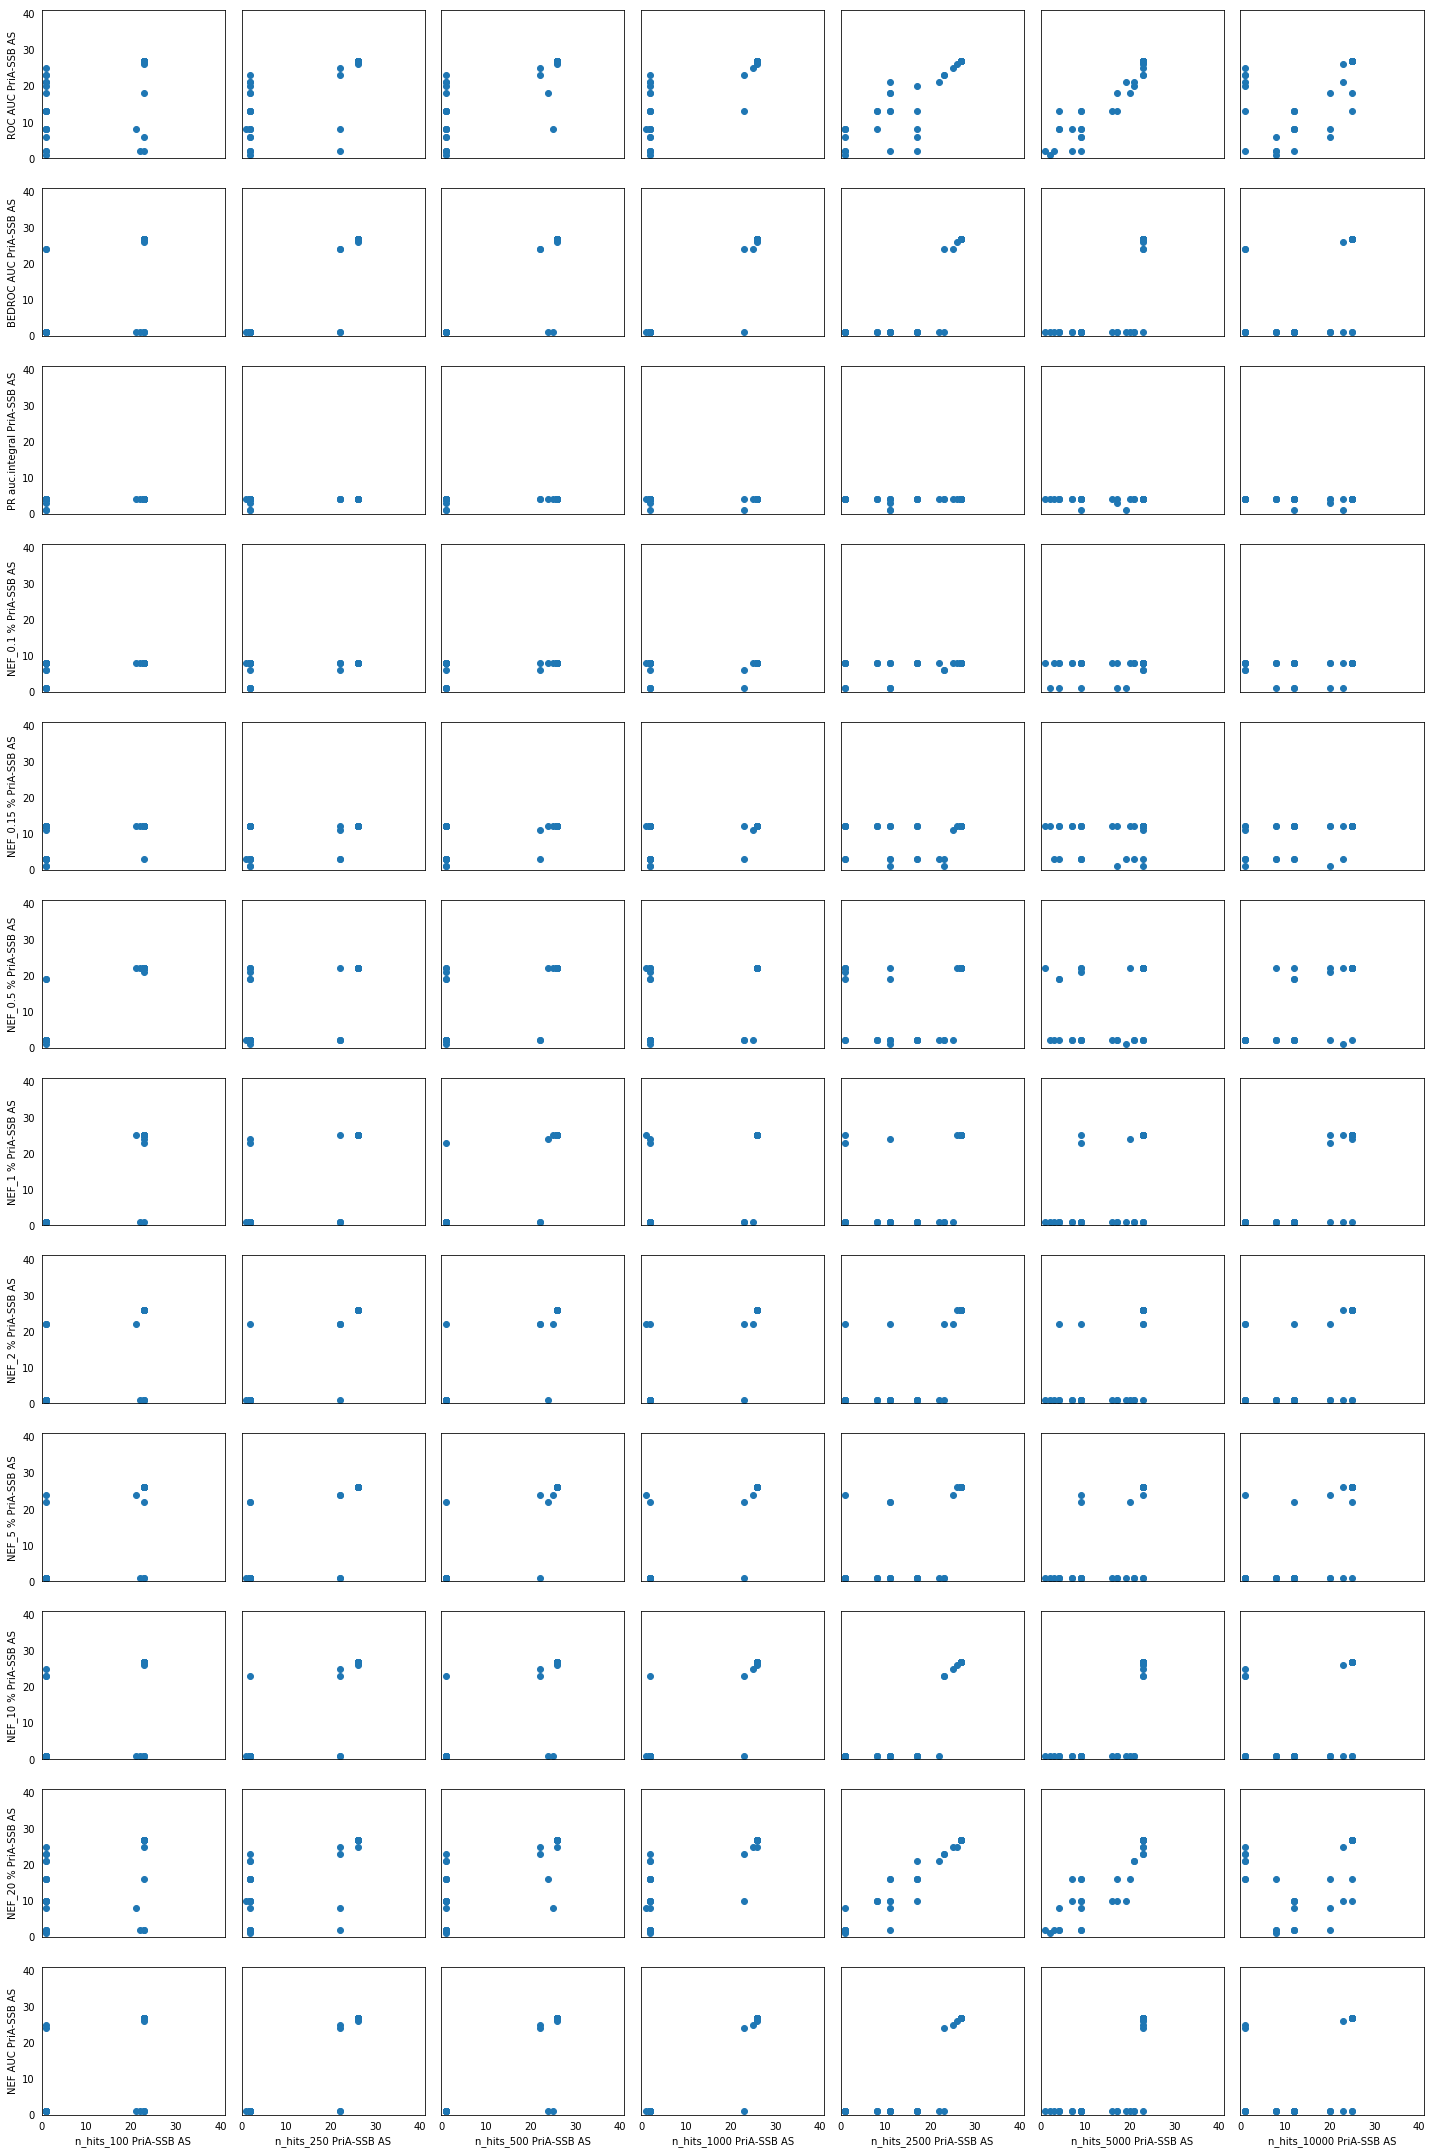

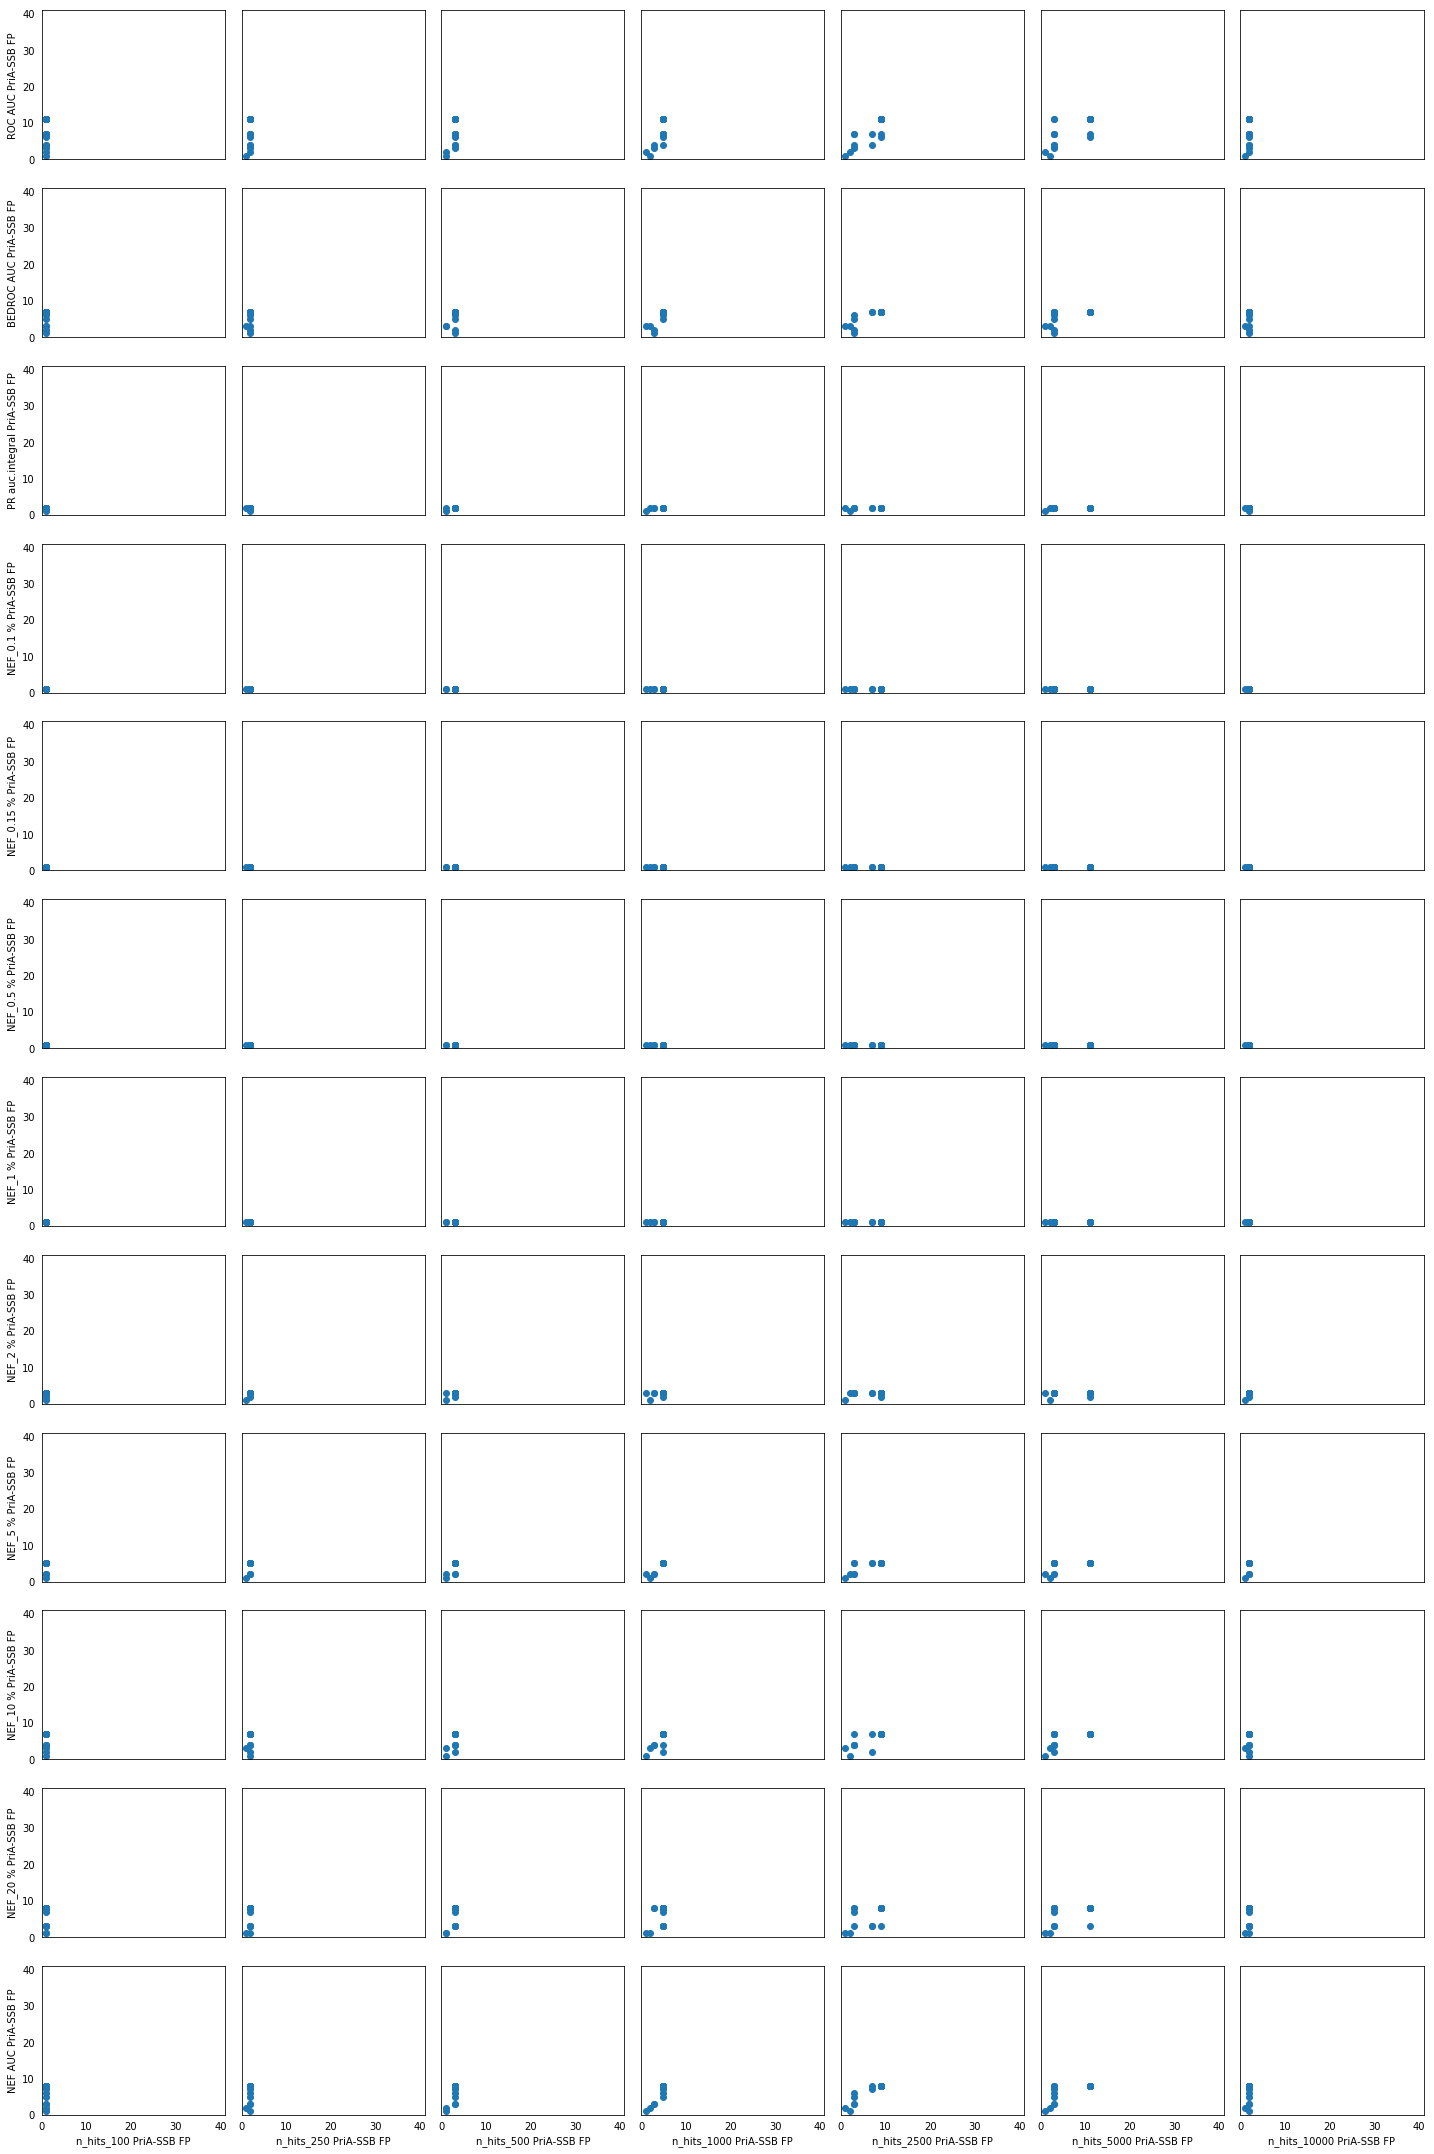

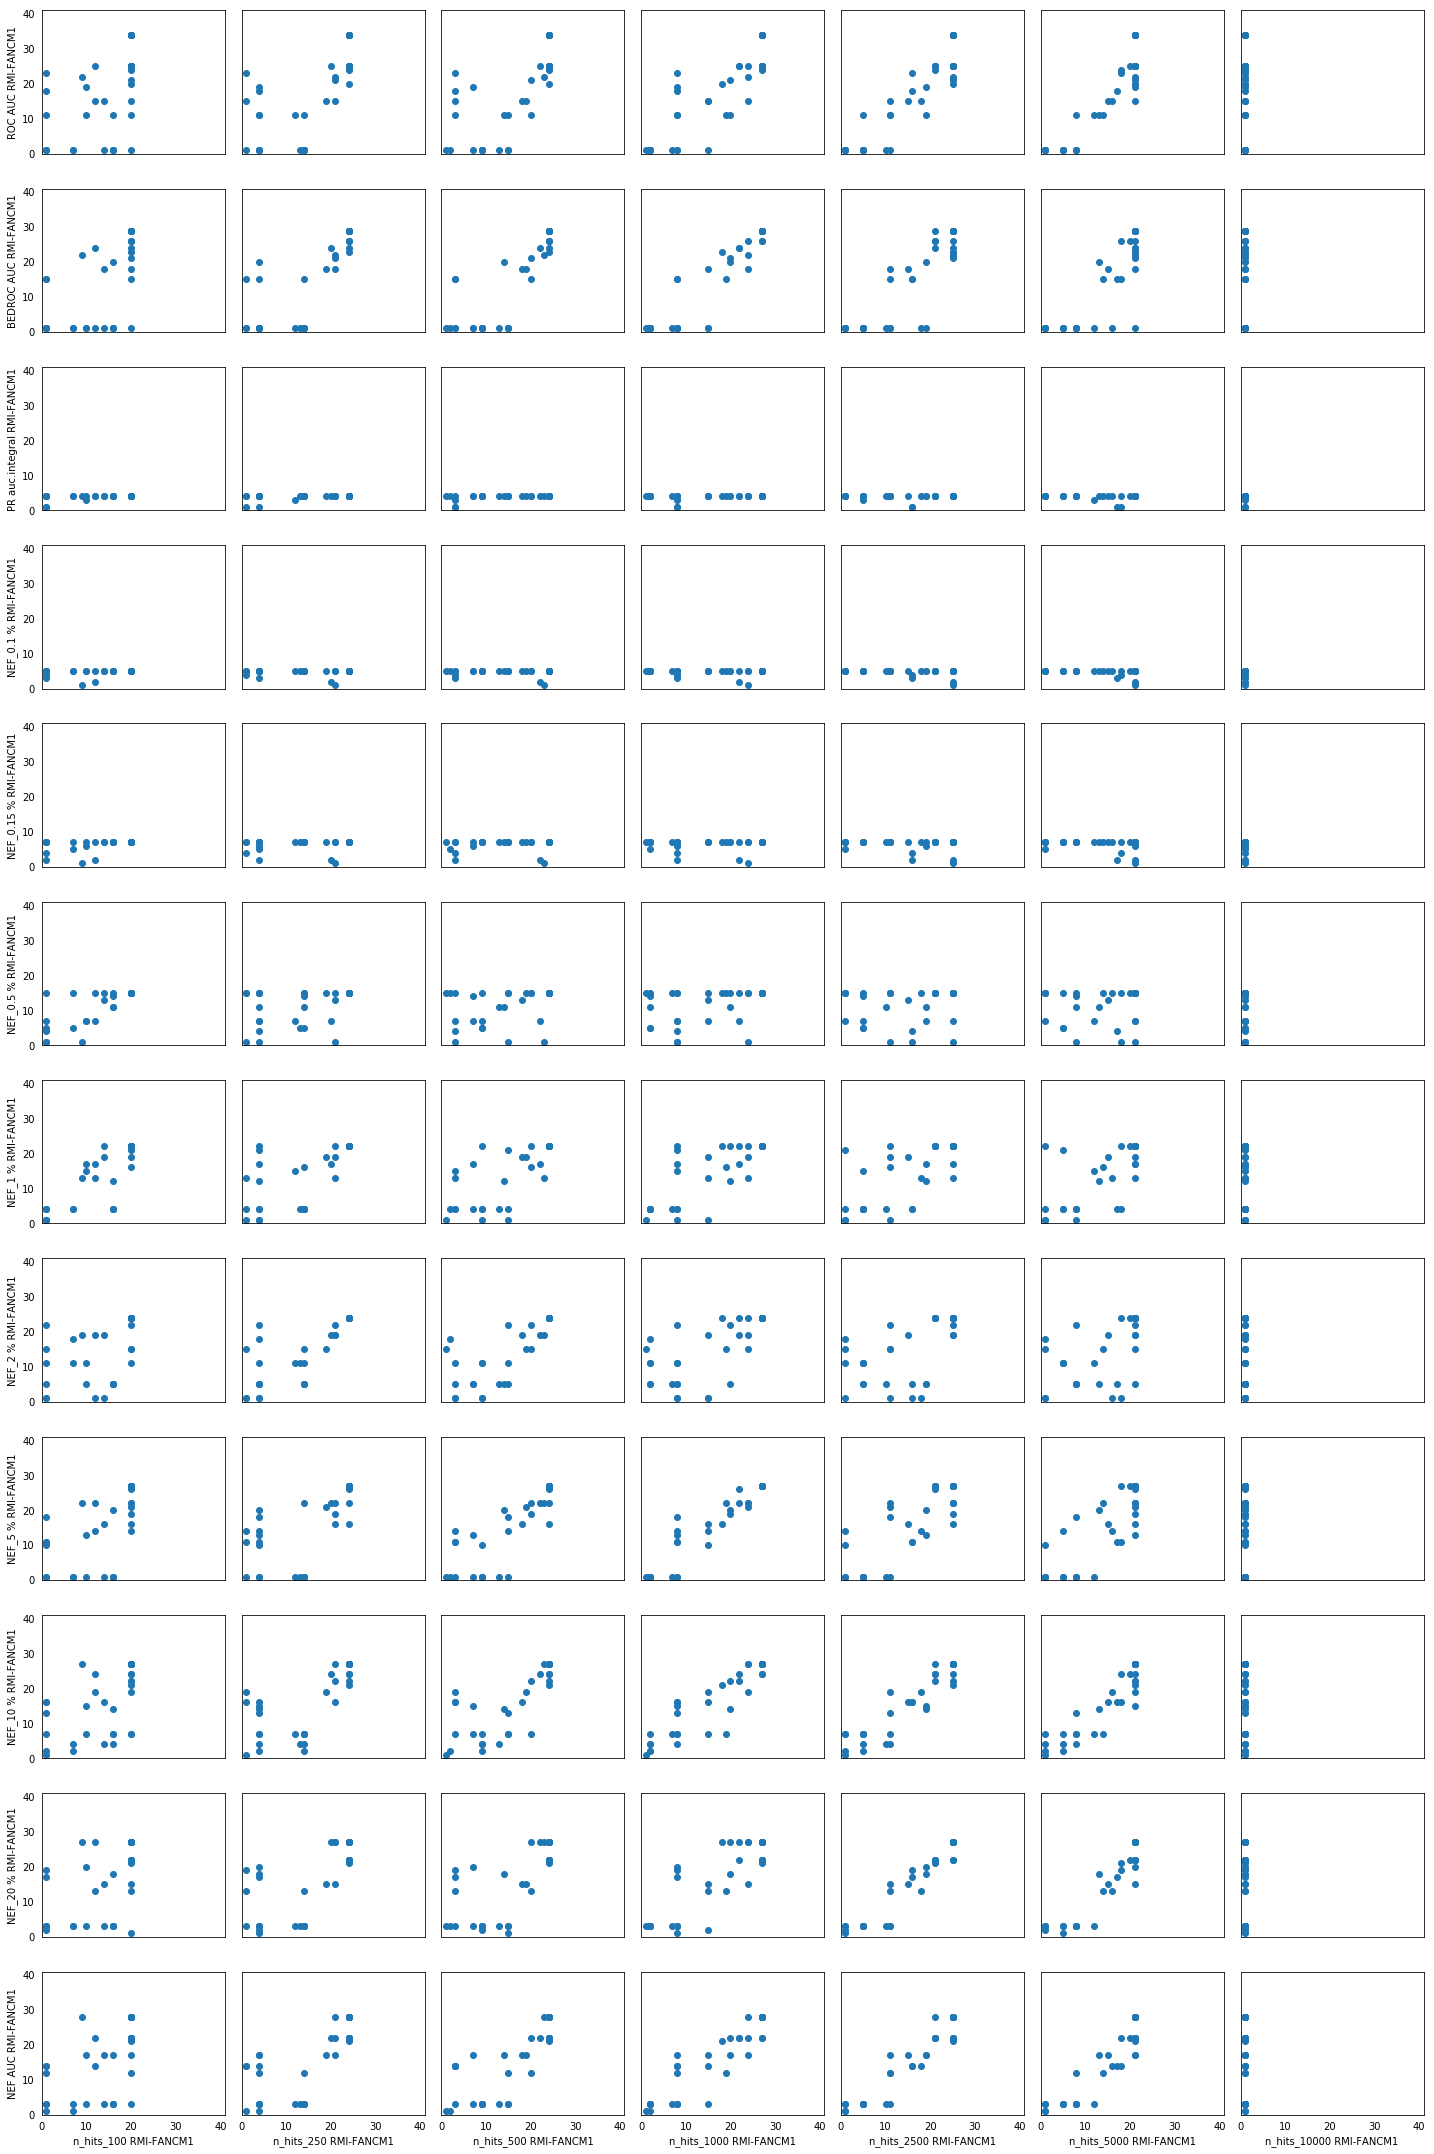

In [10]:
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
matplotlib.rcParams.update({'font.size': 10})
if not os.path.exists('./cv_ps_figures/cv_scatter_plots_nhits/'):
    os.makedirs('./cv_ps_figures/cv_scatter_plots_nhits/')
for l in labels:
    curr_metrics = [m for m in metric_names[:-21] if l in m]
    curr_hits = [m for m in metric_names[-21:] if l in m]
    file_name = './cv_ps_figures/cv_scatter_plots_nhits/' + l.replace(' ', '_') + '.png'
    plot_scatter_nhits_alt(agg_comp_dict, curr_metrics, curr_hits, file_name, figsize=(20,30))

## Box Plots for all Models

In [11]:
matplotlib.rcParams.update({'font.size': 20})
save_dir = './cv_ps_figures/cv_boxplots/'
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
for l in labels:
    curr_metrics = [m for m in metric_names if l in m]
    for metric in curr_metrics:
        metric_df = gather_df[metric]
        metric_df = metric_df.xs('test_metrics', level='set')
        metric_df = metric_df.drop('Folds Mean', level='fold')
        k = len(metric_df.index.levels[1]) - 2
        for i in range(k):
            metric_df = metric_df.drop('fold ' + str(i), level='fold')
        metric_df.sort(ascending=False)
        boxplot_names = [m for (m,f) in metric_df.index.tolist()]

        metric_df = gather_df[metric]
        metric_df = metric_df.xs('test_metrics', level='set')
        metric_df = metric_df.drop('Folds Mean', level='fold')
        metric_df = metric_df.drop('Folds Median', level='fold')
        
        boxplot_data = []
        for model in boxplot_names:
            boxplot_data.append(metric_df.loc[model])
        
        file_name = metric.replace(' '+l, '')
        file_name = file_name.replace('%', '_')
        file_name = file_name.replace('.', '_')
        file_name = file_name.replace(' ', '_')
        file_name = save_dir+'/'+l.replace(' ','_')+'/'+file_name+'.png'
        
        plt.figure(figsize=(30, 10))
        plt.boxplot(x=boxplot_data, labels=boxplot_names)
        plt.xticks(rotation=90)
        plt.ylabel(metric.replace(' '+l, ''))
        plt.title(metric)
        plt.tight_layout()
        plt.savefig(file_name, bbox_inches='tight')
        plt.show()

AttributeError: 'Series' object has no attribute 'sort'

In [ ]:
save_dir = './cv_ps_figures/cv_boxplots/'
labels=['PriA-SSB AS','PriA-SSB FP','RMI-FANCM1']
for l in labels:
    curr_metrics = [m for m in metric_names if l in m]
    for metric in curr_metrics:
        file_name = metric.replace(' '+l, '')
        file_name = file_name.replace('%', '_')
        file_name = file_name.replace('.', '_')
        file_name = file_name.replace(' ', '_')
        file_name = save_dir+'/'+l.replace(' ','_')+'/'+file_name+'.png'
        file_name = './/figure//'+file_name
        print('\\includegraphics[width=0.8\\linewidth]{'+file_name+'}\\\\')